Импортируем необходимые библиотеки

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


Считаем большой файл, с указанием типоф файлов для экономии памяти

In [3]:
dtypes = {
    "row_id": "int64",
    "timestamp": "int64",
    "user_id": "int32",
    "content_id": "int16",
    "content_type_id": "boolean",
    "task_container_id": "int16",
    "user_answer": "int8",
    "answered_correctly": "int8",
    "prior_question_elapsed_time": "float32",
    "prior_question_had_explanation": "boolean"
}
train = pd.read_csv("train.csv", dtype=dtypes)

Посмотрим начало таблицы

In [4]:
display(train.head(10))

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,False,1,3,1,NaN,<NA>
1,1,56943,115,5716,False,2,2,1,37000.0,False
2,2,118363,115,128,False,0,0,1,55000.0,False
3,3,131167,115,7860,False,3,0,1,19000.0,False
4,4,137965,115,7922,False,4,1,1,11000.0,False
5,5,157063,115,156,False,5,2,1,5000.0,False
6,6,176092,115,51,False,6,0,1,17000.0,False
7,7,194190,115,50,False,7,3,1,17000.0,False
8,8,212463,115,7896,False,8,2,1,16000.0,False
9,9,230983,115,7863,False,9,0,1,16000.0,False


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int32  
 3   content_id                      int16  
 4   content_type_id                 boolean
 5   task_container_id               int16  
 6   user_answer                     int8   
 7   answered_correctly              int8   
 8   prior_question_elapsed_time     float32
 9   prior_question_had_explanation  boolean
dtypes: boolean(2), float32(1), int16(2), int32(1), int64(2), int8(2)
memory usage: 3.2 GB


DataFrame состоит из 101230332 строк, 10 столбцов
Произведем анализ столбцов файла train

row_id: (int64) идентификационный код строки.

timestamp: (int64) время между этим взаимодействием с пользователем и первым событием от этого пользователя.

user_id: (int32) Идентификационный код пользователя.

content_id: (int16) Идентификационный код взаимодействия с пользователем

content_type_id: (bool) False, если событием был заданный пользователю вопрос, True, если событием был просмотр пользователем лекции .

task_container_id: (int16) Идентификационный код пакета вопросов или лекций. Например, пользователь может просмотреть три вопроса подряд, прежде чем увидит пояснения к любому из них. Все эти три параметра будут иметь общий идентификатор task_container_id. Монотонно увеличивающийся для каждого пользователя.

user_answer: (int8) ответ пользователя на вопрос, если таковой имеется. 

answered_correctly: (int8), если пользователь ответил правильно. Если -1 то это лекция.

prior_question_elapsed_time: (с плавающей точкой 32) Сколько времени потребовалось пользователю, чтобы ответить на предыдущий набор вопросов, игнорируя все лекции между ними. Это значение используется в одном наборе вопросов и равно нулю для первого набора вопросов пользователя или лекции. Обратите внимание, что это общее время, затраченное пользователем на решение всех вопросов из предыдущего пакета.

prior_question_had_explanation: (bool) Видел ли пользователь объяснение и правильные ответы после ответа на предыдущий набор вопросов, игнорируя любые лекции между ними. Это значение используется в одном наборе вопросов и равно нулю для первого набора вопросов пользователя или лекции. Как правило, первые несколько вопросов, которые видит пользователь, были частью вступительного диагностического теста, на который он не получил никакой обратной связи.

Посчитаем количество уникальных пользователей.

In [6]:
train.user_id.nunique()

393656

Найдем топ самых активных пользователей

In [7]:
user_counts = train['user_id'].value_counts()[0:30]


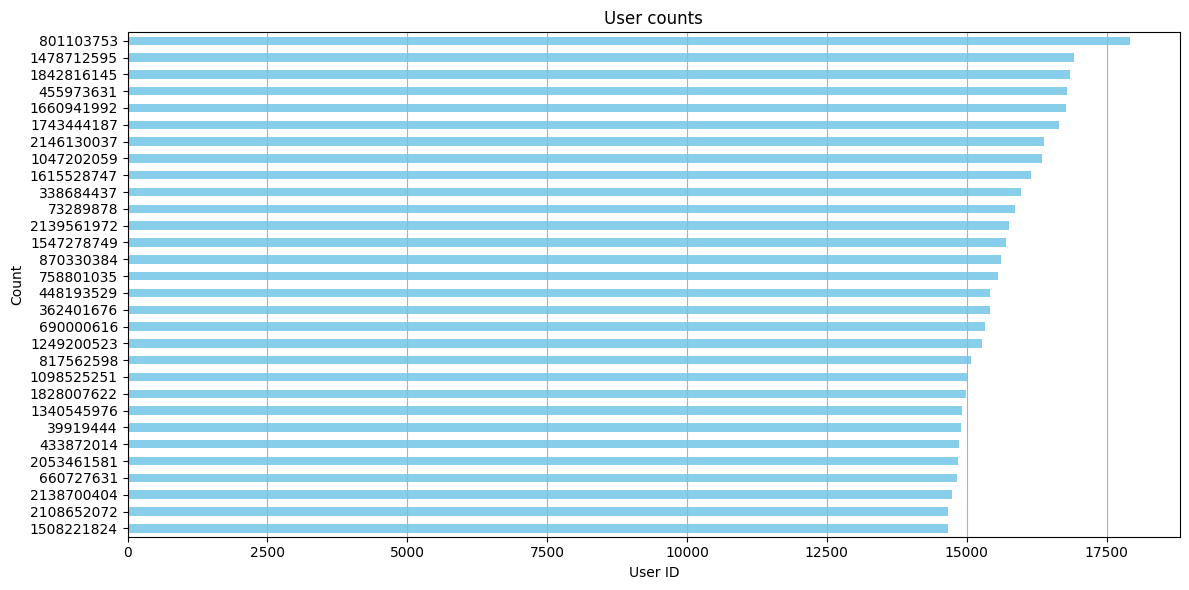

In [35]:
plt.figure(figsize=(12, 6))
user_counts[::-1].plot(kind='barh', color='skyblue')
plt.title('User counts')
plt.xlabel('User ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='x')

# Показать график
plt.tight_layout()
plt.show()

Найдем топ самых популярных task_container_id, до куда дошли пользователи

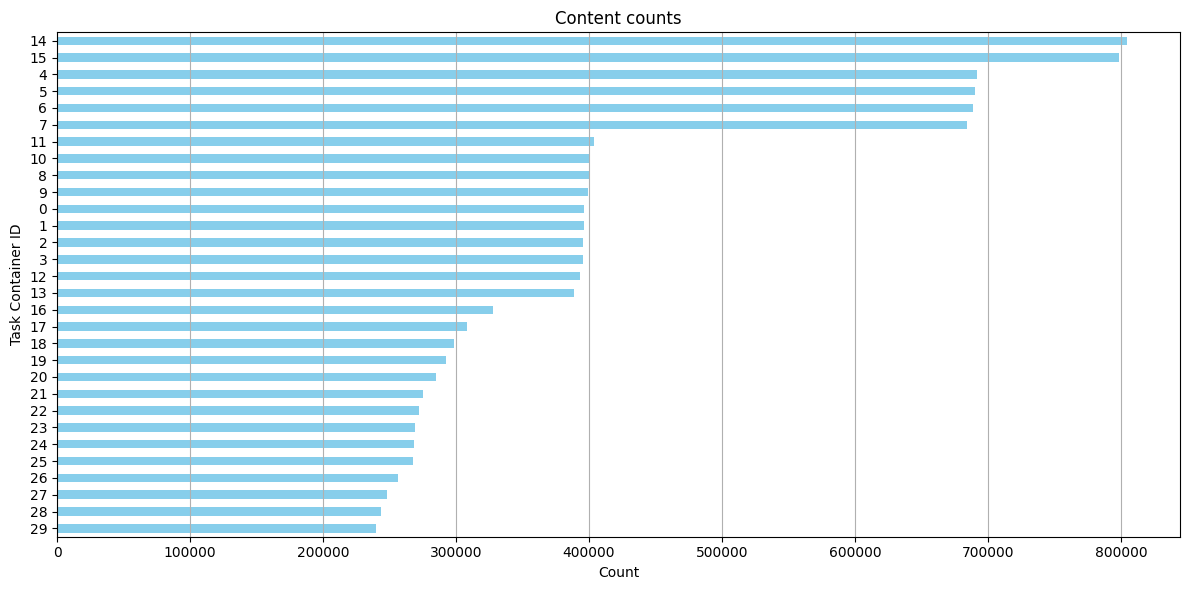

In [14]:
content_counts = train['task_container_id'].value_counts()[0:30]

plt.figure(figsize=(12, 6))
content_counts[::-1].plot(kind='barh', color='skyblue')
plt.title('Content counts')
plt.xlabel('Count')
plt.ylabel('Task Container ID')
plt.xticks(rotation=0)
plt.grid(axis='x')

# Показать график
plt.tight_layout()
plt.show()

Произведем анализ записей из таблицы и узнаем распределение ответов на вопросы и обращения студентов к лекциям.
Отобразим это на графике.

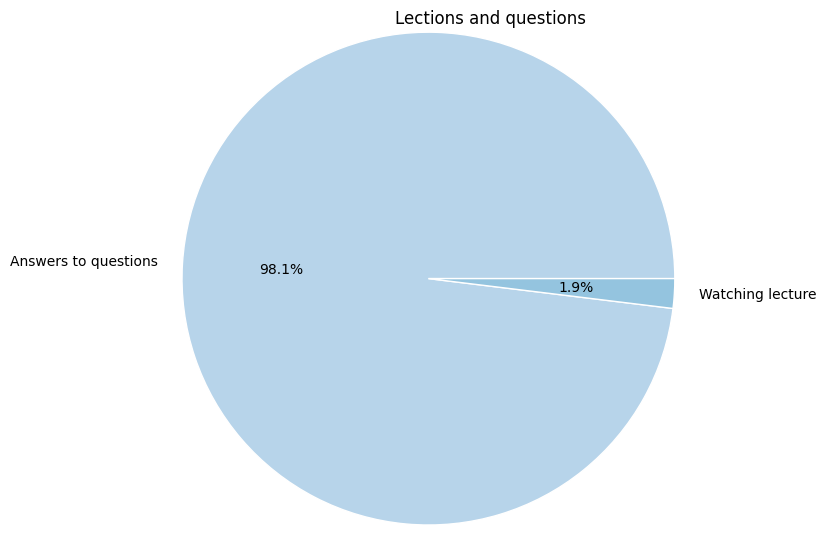

In [157]:
content_types = train['content_type_id'].value_counts(normalize=True)
colors = plt.get_cmap('Blues')(np.linspace(0.3, 0.4, 2))
#colors = ['Blue', 'skyblue']

# plot
fig, ax = plt.subplots()
ax.pie(content_types, colors=colors, autopct='%1.1f%%', labels=["Answers to questions", "Watching lecture"], radius=4, center=(4, 4),
       wedgeprops={"edgecolor": "white"},  frame=False)

ax.set(xlim=(2, 8),
       ylim=(2, 8))
plt.title("Lections and questions")
plt.show()

Считаем файл с лекциями и посмотрим первые строки

In [147]:
lect_data = pd.read_csv("lectures.csv")
display(lect_data.head())

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


Оценим информацию 

In [148]:
display(lect_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


None

DataFrame состоит из 418 строк, 4 столбцов, нет ниодного пропущенного значения

lecture_id: внешний ключ для столбца train content_id, если тип содержимого content_tupe_id - lecture (1).

tag: один тег, кодирующий лекцию. Значения тегов указаны не будут, но этих кодов достаточно для объединения лекций в группы.

part: код категории верхнего уровня для лекции.

type_of: краткое описание основной цели лекции.

Лекции поделены по частям, всего их 7. Найдем распределение лекций по всем частям. и построим график.

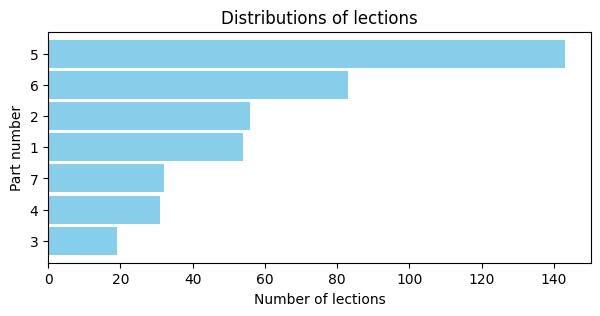

In [150]:
lect_parts = lect_data["part"].value_counts()
plt.figure(figsize=(7, 3))
lect_parts[::-1].plot(kind='barh', color='skyblue', width=0.9)
plt.title('Distributions of lections')
plt.xlabel('Number of lections')
plt.ylabel('Part number')
plt.show()

Из графика  видим что больше всего лекций из раздела 5

Так же лекции делятся на типы посмотрим их и построим их графики

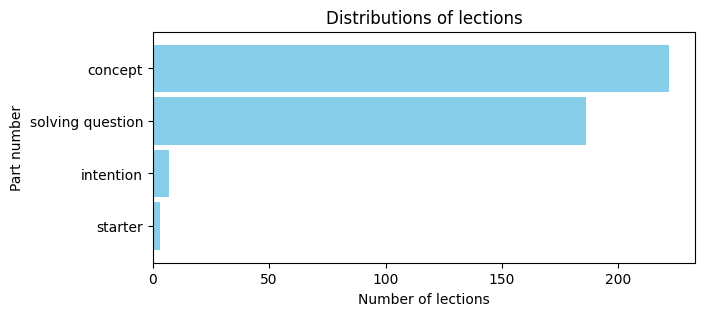

In [153]:
lect_types = lect_data["type_of"].value_counts()
plt.figure(figsize=(7, 3))
lect_types[::-1].plot(kind='barh', color='skyblue', width=0.9)
plt.title('Distributions of lections')
plt.xlabel('Number of lections')
plt.ylabel('Part number')
plt.show()

Считаем файл questions

In [17]:
qw_data = pd.read_csv("questions.csv")
display(qw_data.head())

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [18]:
display(qw_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


None

DataFrame состоит из 13523 строк, 5 столбцов, отсутстсвует одно значение "tags"

question_id: внешний ключ для столбца train/test content_id, если тип содержимого - question (0).

bundle_id: код, для которого вопросы подаются вместе.

correct_answer: ответ на вопрос. Можно сравнить со столбцом train user_answer, чтобы проверить, был ли пользователь прав.

part: код категории верхнего уровня для вопроса.

tags: один или несколько подробных кодов тегов для вопроса. Значение тегов приведено не будет, но этих кодов достаточно для объединения вопросов в группы

Вопросы поделены по частям, всего их 7. Найдем распределение вопросов по всем частям. и построим график.

In [25]:
qw_parts = qw_data["part"].value_counts()
display(qw_parts)

part
5    5511
2    1647
3    1562
4    1439
6    1212
7    1160
1     992
Name: count, dtype: int64

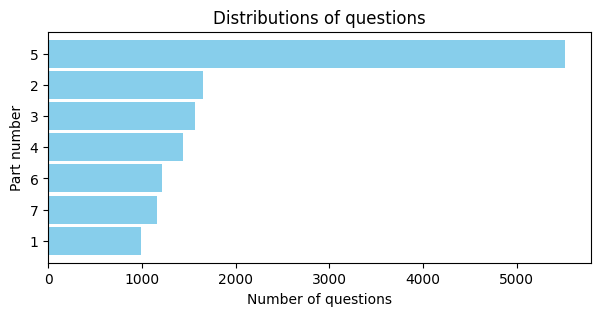

In [37]:
plt.figure(figsize=(7, 3))
qw_parts[::-1].plot(kind='barh', color='skyblue', width=0.9)
plt.title('Distributions of questions')
plt.xlabel('Number of questions')
plt.ylabel('Part number')
plt.show()

Найдем распределение правильных ответов по варианам и построим диаграмму.

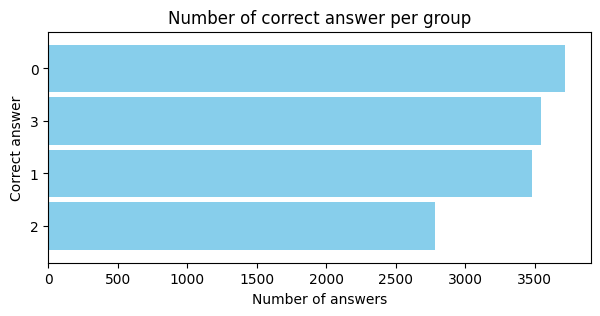

In [40]:
correct_ans = qw_data.correct_answer.value_counts()
plt.figure(figsize=(7, 3))
correct_ans[::-1].plot(kind='barh', color='skyblue', width=0.9)
plt.title('Number of correct answer per group')
plt.xlabel('Number of answers')
plt.ylabel('Correct answer')
plt.show()

Узнаем частоту правильных ответов студентов

In [43]:
# Правильные ответы
correct = train[train['answered_correctly'] == 1]['user_id'].shape[0]

# Неправильные ответы
incorrect = train[train['answered_correctly'] == 0]['user_id'].shape[0]

Построим графики

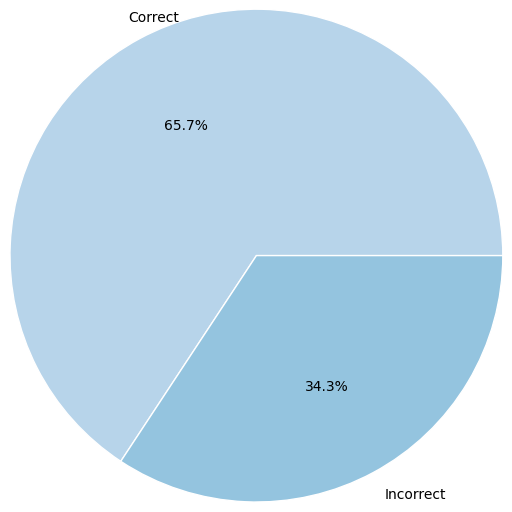

In [46]:

colors = plt.get_cmap('Blues')(np.linspace(0.3, 0.4, 2))

# plot
fig, ax = plt.subplots()
ax.pie([correct, incorrect], colors=colors, autopct='%1.1f%%', labels=["Correct", "Incorrect"], radius=4, center=(4, 4),
       wedgeprops={"edgecolor": "white"}, frame=False)

ax.set(xlim=(2, 8),
       ylim=(2, 8))

plt.show()

Теперь мы можем определить расспределение правильных ответов по частям вопросов которых 7 и построить графики.

In [95]:
part_1_id = qw_data[qw_data["part"] == 1]['question_id']
part_1_train = train[train["content_type_id"] == 1 & (train["content_id"].isin(part_1_id) & (train["answered_correctly"] != -1))]
correct_1 = part_1_train.answered_correctly.value_counts(normalize=True) * 100


In [93]:
part_2_id = qw_data[qw_data["part"] == 2]['question_id']
part_2_train = train[train["content_type_id"] == 1 & (train["content_id"].isin(part_2_id)) & (train["answered_correctly"] != -1)]
correct_2 = part_2_train.answered_correctly.value_counts(normalize=True) * 100


In [97]:
part_3_id = qw_data[qw_data["part"] == 3]['question_id']
part_3_train = train[train["content_type_id"] == 1 & (train["content_id"].isin(part_3_id)) & (train["answered_correctly"] != -1)]
correct_3 = part_3_train.answered_correctly.value_counts(normalize=True) * 100

In [99]:
part_4_id = qw_data[qw_data["part"] == 4]['question_id']
part_4_train = train[train["content_type_id"] == 1 & (train["content_id"].isin(part_4_id)) & (train["answered_correctly"] != -1)]
correct_4 = part_4_train.answered_correctly.value_counts(normalize=True) * 100

In [100]:
part_5_id = qw_data[qw_data["part"] == 5]['question_id']
part_5_train = train[train["content_type_id"] == 1 & (train["content_id"].isin(part_5_id)) & (train["answered_correctly"] != -1)]
correct_5 = part_5_train.answered_correctly.value_counts(normalize=True) * 100

In [101]:
part_6_id = qw_data[qw_data["part"] == 6]['question_id']
part_6_train = train[train["content_type_id"] == 1 & (train["content_id"].isin(part_6_id)) & (train["answered_correctly"] != -1)]
correct_6 = part_6_train.answered_correctly.value_counts(normalize=True) * 100

In [102]:
part_7_id = qw_data[qw_data["part"] == 7]['question_id']
part_7_train = train[train["content_type_id"] == 1 & (train["content_id"].isin(part_7_id)) & (train["answered_correctly"] != -1)]
correct_7 = part_7_train.answered_correctly.value_counts(normalize=True) * 100


Построим соотношения правильных ответов по частям

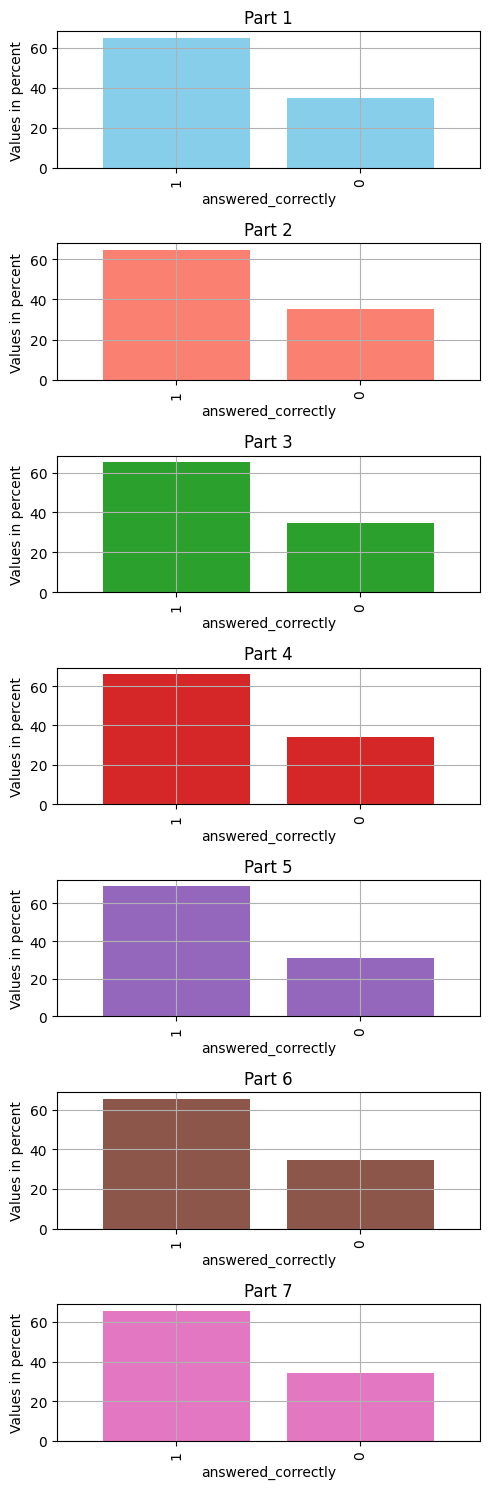

In [128]:

parts = [correct_1, correct_2, correct_3, 
         correct_4, correct_5, correct_6, correct_7]

colors = ['skyblue', 'salmon',
    '#2ca02c',  # зеленый
    '#d62728',  # красный
    '#9467bd',  # пурпурный
    '#8c564b',  # коричневый
    '#e377c2'   # розовый
 ]

# # Создаем подграфики
fig, axs = plt.subplots(7, 1, figsize=(5, 15))  # 4 строки, 2столбец
for i in range(7):
    parts[i].plot(kind='bar', ax=axs[i], color=colors[i], width=0.8, grid=True, title=f'Part {i + 1}')
    axs[i].set_ylabel('Values in percent')

plt.tight_layout()  # Упаковка подграфиков
plt.show()

Теперь сравним количество правильных ответов по частям в процентах, из графика видим что лучше всего далась пятая часть вопросов

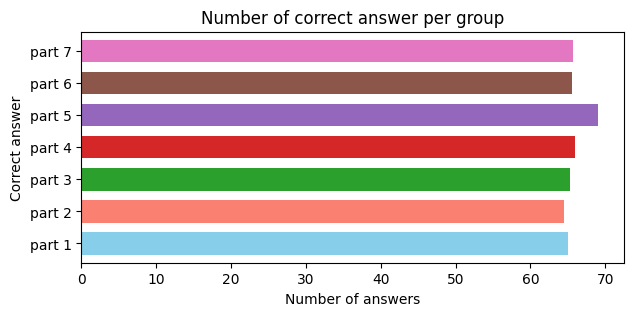

In [145]:
all_part = pd.DataFrame(parts, index=[f"part {i}" for i in range(1, 8)])
plt.figure(figsize=(7, 3))
all_part[1].plot(kind='barh', color=colors, width=0.7)
plt.title('Number of correct answer per group')
plt.xlabel('Number of answers')
plt.ylabel('Correct answer')
plt.show()

Из диаграммы видим что наибольшее количество правильных ответов в 5й части